<a href="https://colab.research.google.com/github/SeloPeylo/h-da-Mashine-Learning-Praktikum/blob/master/Copy_of_logregrneuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://keras.io/
!pip install -q keras


import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns
import keras as ks
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [ ]:
# Importing Data
data = pd.read_csv("https://gist.githubusercontent.com/naska29/53a4627ffabf54e2418e290e45458439/raw/228e63c417dc136424bfc64062e4a4613695eb03/adult.data",header=1, delimiter=',', )
data.columns=[
        'Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Martial Status',
        'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
        'Hours per week', 'Country', 'Target']
#print(data)




# Categorizing Strings with LabelEncoder
le = preprocessing.LabelEncoder()
categories = ['Occupation', 'Workclass', 'Education', 'Martial Status', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
for i in categories:
  data[i] = le.fit_transform(data[i])
'''
data['Occupation'] = le.fit_transform(data['Occupation'])
data['Workclass'] = le.fit_transform(data['Workclass'])
data['Education'] = le.fit_transform(data['Education'])
data['Martial Status'] = le.fit_transform(data['Martial Status'])
data['Relationship'] = le.fit_transform(data['Relationship'])
data['Race'] = le.fit_transform(data['Race'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Country'] = le.fit_transform(data['Country'])
data['Target'] = le.fit_transform(data['Target'])
'''
print(data)




# Splitting Datasets
datay = data['Target']
datax = data.iloc[:,:14]

trainrows = int(len(data)*0.6)
print('Train-Data Splits at row from Data #', trainrows, '-', len(data))
xtrain = datax.iloc[:trainrows,:]
xtest = datax.iloc[trainrows:,:]
ytrain = datay.iloc[:trainrows]
ytest = datay.iloc[trainrows:]

testrows = int(len(xtest)*0.5)
print('Valid-Data Splits at row from Test-Data #', testrows, '-', len(xtest))
xvalid = xtest.iloc[testrows:,:]
xtest = xtest.iloc[:testrows,:]
yvalid = ytest.iloc[testrows:]
ytest = ytest.iloc[:testrows]

data.to_csv('lab03data.csv')

       Age  Workclass  fnlwgt  Education  Education-Num  Martial Status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
3       28          4  338409          9             13               2   
4       37          4  284582         12             14               2   
5       49          4  160187          6              5               3   
6       52          6  209642         11              9               2   
7       31          4   45781         12             14               4   
8       42          4  159449          9             13               2   
9       37          4  280464         15             10               2   
10      30          7  141297          9             13               2   
11      23          4  122272          9             13               4   
12      32          4  20

In [ ]:
alphas =[0,0.0001,0.001,0.01,0.02,0.04,0.08,0.16, 0.24, 0.36, 0.48, 0.52, 0.64]
names =['Perceptron','MLP10 LR0.001 Adam', 'MLP20 LR0.01 SGD', 'MLP50 LR0.001 SGD', 'MLP100 LR0.01 LBFGS', 'MLP200 Adam']

final = pd.DataFrame(columns=names, index=alphas )
print(final)


       Perceptron MLP10 LR0.001 Adam MLP20 LR0.01 SGD MLP50 LR0.001 SGD  \
0.0000        NaN                NaN              NaN               NaN   
0.0001        NaN                NaN              NaN               NaN   
0.0010        NaN                NaN              NaN               NaN   
0.0100        NaN                NaN              NaN               NaN   
0.0200        NaN                NaN              NaN               NaN   
0.0400        NaN                NaN              NaN               NaN   
0.0800        NaN                NaN              NaN               NaN   
0.1600        NaN                NaN              NaN               NaN   
0.2400        NaN                NaN              NaN               NaN   
0.3600        NaN                NaN              NaN               NaN   
0.4800        NaN                NaN              NaN               NaN   
0.5200        NaN                NaN              NaN               NaN   
0.6400        NaN        

## MLP Classfiers with layer sizes 10-200, 'Adam' solver and learning rate = 0.001

In [ ]:
for a in alphas:
  classifiers= [Perceptron(alpha=a, max_iter=50),
                MLPClassifier(alpha=a,hidden_layer_sizes=(10,),solver='adam', learning_rate_init=0.001),
                MLPClassifier(alpha=a,hidden_layer_sizes=(20,),solver='sgd', learning_rate_init=0.01),
                MLPClassifier(alpha=a,hidden_layer_sizes=(50,),solver='sgd', learning_rate_init=0.001),
                MLPClassifier(alpha=a,hidden_layer_sizes=(100),solver='lbfgs', learning_rate_init=0.01),
                MLPClassifier(alpha=a,hidden_layer_sizes=(200,),solver='adam', learning_rate_init=0.001)
               ]

  for name, clf in zip(names,classifiers):
    clf.fit(xtrain,ytrain) #clf.fit(X,Y)
    score = clf.score(xtest,ytest)
    #print("Score for {}: {}".format(name,score))
    final[name][a] = score
    
display(final)



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Perceptron,MLP10 LR0.001 Adam,MLP20 LR0.01 SGD,MLP50 LR0.001 SGD,MLP100 LR0.01 LBFGS,MLP200 Adam
0.0000,0.791001,0.781634,0.758753,0.758139,0.757678,0.791155
0.0001,0.791001,0.664312,0.757678,0.759214,0.722512,0.77933
0.0010,0.791001,0.764588,0.757678,0.759828,0.757678,0.793305
0.0100,0.791001,0.775952,0.760289,0.757985,0.757678,0.77242
0.0200,0.791001,0.787469,0.757678,0.757678,0.242322,0.78102
0.0400,0.791001,0.774877,0.757678,0.759214,0.757678,0.785934
0.0800,0.791001,0.73449,0.757678,0.758292,0.757678,0.728194
0.1600,0.791001,0.783937,0.757832,0.757678,0.634214,0.790233
0.2400,0.791001,0.788544,0.757678,0.757832,0.761824,0.776566
0.3600,0.791001,0.315725,0.757678,0.758292,0.240786,0.778409


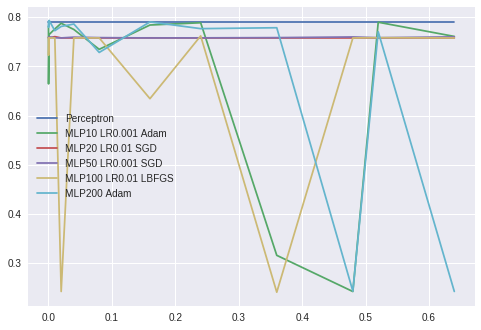

In [ ]:
import matplotlib.pyplot as plt
plt.plot(final['Perceptron'])
plt.plot(final['MLP10 LR0.001 Adam'])
plt.plot(final['MLP20 LR0.01 SGD'])
plt.plot(final['MLP50 LR0.001 SGD'])
plt.plot(final['MLP100 LR0.01 LBFGS'])
plt.plot(final['MLP200 Adam'])
plt.legend()